In [2]:
import rioxarray as riox
import xarray as xr
import rasterio as rio
import h5py
import numpy as np
import matplotlib.pyplot as plt
from rasterio.transform import from_origin

Opening h5 file using rioxarray/rasterio

In [3]:
riox.open_rasterio("h5/lst_ECOSTRESS_L2_LSTE_28628_015_20230724T203731_0601_02.h5")

/home/geoknight/miniconda3/envs/geoknight/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/geoknight/miniconda3/envs/geoknight/lib/python3.12/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  warnings.warn(str(rio_warning.message), type(rio_warning.message))  # type: ignore
/home/geoknight/miniconda3/envs/geoknight/lib/python3.12/site-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
/home/geoknight/miniconda3/envs/geoknight/lib/python3.12/site-packages/rioxarray/_io.py:1143: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or r

<xarray.Dataset> Size: 700MB
Dimensions:        (band: 1, x: 5400, y: 5632)
Coordinates:
  * band           (band) int64 8B 1
  * x              (x) float64 43kB 0.5 1.5 2.5 ... 5.398e+03 5.398e+03 5.4e+03
  * y              (y) float64 45kB 0.5 1.5 2.5 ... 5.63e+03 5.63e+03 5.632e+03
    spatial_ref    int64 8B 0
Data variables: (12/15)
    SDS_Emis1      (band, y, x) uint8 30MB ...
    SDS_Emis5_err  (band, y, x) uint16 61MB ...
    SDS_EmisWB     (band, y, x) uint8 30MB ...
    SDS_LST        (band, y, x) uint16 61MB ...
    SDS_LST_err    (band, y, x) uint8 30MB ...
    SDS_PWV        (band, y, x) uint16 61MB ...
    ...             ...
    SDS_Emis2_err  (band, y, x) uint16 61MB ...
    SDS_Emis3      (band, y, x) uint8 30MB ...
    SDS_Emis3_err  (band, y, x) uint16 61MB ...
    SDS_Emis4      (band, y, x) uint8 30MB ...
    SDS_Emis4_err  (band, y, x) uint16 61MB ...
    SDS_Emis5      (band, y, x) uint8 30MB ...
Attributes: (12/117)
    SDS_Emis1_add_offset:        0.49
    SDS_Emis1_coordsys:          cartesian
    SDS_Emis1_err_add_offset:    0
    SDS_Emis1_err_coordsys:      cartesian
    SDS_Emis1_err_format:        scaled
    SDS_Emis1_err_long_name:     Band 1 Emissivity error
    ...                          ...
    SDS_PWV__FillValue:          0
    SDS_QC_coordsys:             cartesian
    SDS_QC_format:               unscaled
    SDS_QC_long_name:            Quality Control for LST and emissivity
    SDS_QC_units:                n/a
    SDS_QC_valid_range:          0 65535

Opening h5 file using rioxarray resulted in georeference  warning. It could not find the georeference information from the file. So I will be using h5py to open the file and read the data and find some transform information from the file. Even though, I am able to open file with rioxarray, I could not find transform information int the metadata. I will be using h5py to open the file and read the data and find some transform information from the file.

In [4]:
h5_ds = h5py.File("h5/lst_ECOSTRESS_L2_LSTE_28628_015_20230724T203731_0601_02.h5", 'r')

In [5]:
# List Metadata keys
h5_ds.keys()

<KeysViewHDF5 ['L2 LSTE Metadata', 'SDS', 'StandardMetadata']>

In [6]:
# List Metadata
for x in h5_ds['L2 LSTE Metadata'].keys():
    print(x)

AncillaryNWP
BandSpecification
CloudMaxTemperature
CloudMeanTemperature
CloudMinTemperature
CloudSDevTemperature
Emis1GoodAvg
Emis2GoodAvg
Emis3GoodAvg
Emis4GoodAvg
Emis5GoodAvg
LSTGoodAvg
NWPSource
NumberOfBands
OrbitCorrectionPerformed
QAPercentCloudCover
QAPercentGoodQuality


In [7]:
# List data sets inside h5
for x in h5_ds['SDS'].keys():
    print(x, ":", h5_ds['SDS'][x])

Emis1 : <HDF5 dataset "Emis1": shape (5632, 5400), type "|u1">
Emis1_err : <HDF5 dataset "Emis1_err": shape (5632, 5400), type "<u2">
Emis2 : <HDF5 dataset "Emis2": shape (5632, 5400), type "|u1">
Emis2_err : <HDF5 dataset "Emis2_err": shape (5632, 5400), type "<u2">
Emis3 : <HDF5 dataset "Emis3": shape (5632, 5400), type "|u1">
Emis3_err : <HDF5 dataset "Emis3_err": shape (5632, 5400), type "<u2">
Emis4 : <HDF5 dataset "Emis4": shape (5632, 5400), type "|u1">
Emis4_err : <HDF5 dataset "Emis4_err": shape (5632, 5400), type "<u2">
Emis5 : <HDF5 dataset "Emis5": shape (5632, 5400), type "|u1">
Emis5_err : <HDF5 dataset "Emis5_err": shape (5632, 5400), type "<u2">
EmisWB : <HDF5 dataset "EmisWB": shape (5632, 5400), type "|u1">
LST : <HDF5 dataset "LST": shape (5632, 5400), type "<u2">
LST_err : <HDF5 dataset "LST_err": shape (5632, 5400), type "|u1">
PWV : <HDF5 dataset "PWV": shape (5632, 5400), type "<u2">
QC : <HDF5 dataset "QC": shape (5632, 5400), type "<u2">


In [8]:
# List StandardMetadata
for x in h5_ds['StandardMetadata'].keys():
    print(x, ":", h5_ds['StandardMetadata'][x])

AncillaryInputPointer : <HDF5 dataset "AncillaryInputPointer": shape (), type "|O">
AutomaticQualityFlag : <HDF5 dataset "AutomaticQualityFlag": shape (), type "|O">
AutomaticQualityFlagExplanation : <HDF5 dataset "AutomaticQualityFlagExplanation": shape (), type "|O">
BuildID : <HDF5 dataset "BuildID": shape (), type "|O">
CampaignShortName : <HDF5 dataset "CampaignShortName": shape (), type "|O">
CollectionLabel : <HDF5 dataset "CollectionLabel": shape (), type "|O">
DataFormatType : <HDF5 dataset "DataFormatType": shape (), type "|O">
DayNightFlag : <HDF5 dataset "DayNightFlag": shape (), type "|O">
EastBoundingCoordinate : <HDF5 dataset "EastBoundingCoordinate": shape (1,), type "<f8">
HDFVersionID : <HDF5 dataset "HDFVersionID": shape (), type "|O">
ImageLineSpacing : <HDF5 dataset "ImageLineSpacing": shape (1,), type "<f8">
ImageLines : <HDF5 dataset "ImageLines": shape (1,), type "<i4">
ImagePixelSpacing : <HDF5 dataset "ImagePixelSpacing": shape (1,), type "<f8">
ImagePixels : 

From standard metadata, we will find the transform information. And we will use these bound information to construct the affine transformation

In [8]:
east = float(h5_ds['StandardMetadata']['EastBoundingCoordinate'][0])
north = float(h5_ds['StandardMetadata']['NorthBoundingCoordinate'][0])
south = float(h5_ds['StandardMetadata']['SouthBoundingCoordinate'][0])
west = float(h5_ds['StandardMetadata']['WestBoundingCoordinate'][0])
extent = (west, east, south, north)

ImageLines and ImagePixels in StandardMetadata will be used as rows and columns of the image.

In [76]:
(rows, cols) = h5_ds['StandardMetadata']['ImageLines'][0], h5_ds['StandardMetadata']['ImagePixels'][0]

Calculate cell size

In [35]:
# Calculate cell size
x_res = (east - west) / cols
y_res = (north - south) / rows

Create the affine transform

In [36]:
# Create the affine transform
transform = from_origin(west, north, x_res, y_res)

transform

Affine(0.0009759755383197575, 0.0, 44.22448763018607,
       0.0, -0.0009363377225607996, 29.341634201475134)

Loop through the bands in SDS, construct xarray DataArray with the affine transform and related metadata

In [86]:
da_arr = {}
for x in h5_ds['SDS']:
    # Create an xarray DataArray
    np_array = np.array(h5_ds['SDS'][x])[::-1]
    da = xr.DataArray(
        np_array,
        dims=("y", "x"),  # Dimensions must match the affine transform
        coords={
            "y": np.linspace(north, south, np_array.shape[0]),  # Latitude values
            "x": np.linspace(west, east, np_array.shape[1]),    # Longitude values
        }
    )

    metadata = dict(h5_ds['SDS'][x].attrs)

    # Attach metadata to the DataArray
    if '_FillValue' in metadata:
        da.attrs["_FillValue"] = metadata["_FillValue"][0]  # Extract scalar value
    if 'add_offset' in metadata:
        da.attrs["add_offset"] = metadata["add_offset"][0]  # Extract scalar value
    if 'coordsys' in metadata:
        da.attrs["coordsys"] = metadata["coordsys"].decode("utf-8")  # Decode bytes to string
    if 'format' in metadata:
        da.attrs["format"] = metadata["format"].decode("utf-8")  # Decode bytes to string
    if 'long_name' in metadata:
        da.attrs["long_name"] = metadata["long_name"].decode("utf-8")  # Decode bytes to string
    if 'scale_factor' in metadata:
        da.attrs["scale_factor"] = metadata["scale_factor"][0]  # Extract scalar value
    if 'units' in metadata:
        da.attrs["units"] = metadata["units"].decode("utf-8")  # Decode bytes to string
    if 'valid_range' in metadata:
        da.attrs["valid_range"] = metadata["valid_range"].tolist()  # Convert array to list

    # Assign the CRS and transform
    da.rio.write_crs('EPSG:4326', inplace=True)
    da.rio.write_transform(transform, inplace=True)

    da_arr[x] = da

Merge data arrays into a single xarray Dataset

In [88]:
# Create xarray Dataset
ds = xr.Dataset(da_arr)

Export Dataset to georeferenced netcdf file

In [89]:
ds.to_netcdf('alst_emis.nc')

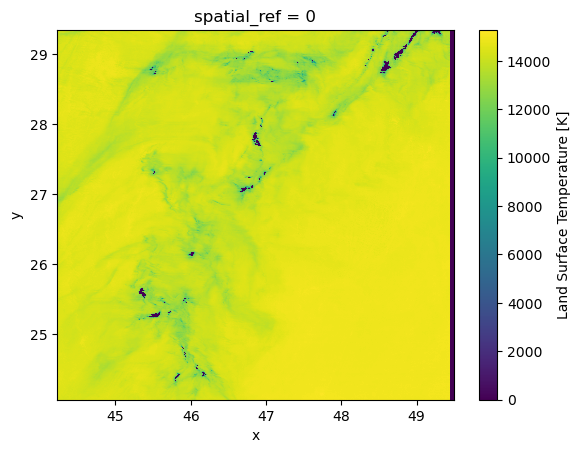

In [91]:
ds['LST'].plot()